<a href="https://colab.research.google.com/github/Gail529/Insurance-Fraud/blob/main/Insurance__fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

loading the necessary libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder 

from sklearn.covariance import EllipticEnvelope


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest


import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
data = pd.read_csv('/content/insurance_claims.csv')
data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


general info about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
#dropping the _c39 column since it is full of NANs
data.dropna(axis=1,inplace=True)
data.isnull().sum().sum()


0

In [ ]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


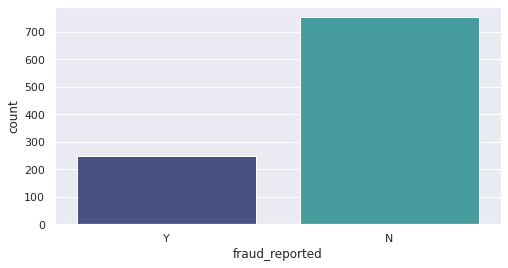

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x="fraud_reported",data=data,palette="mako")

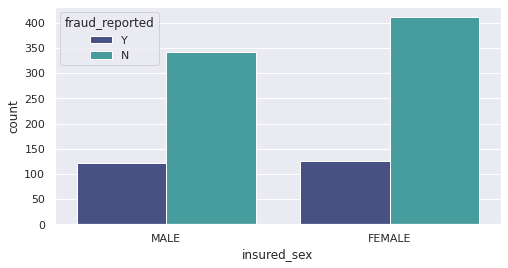

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x="insured_sex",data=data,hue='fraud_reported',palette="mako")

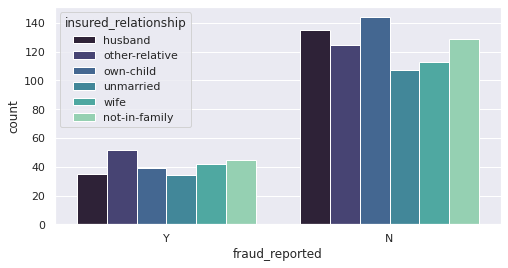

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x="fraud_reported",data=data,hue='insured_relationship',palette="mako")

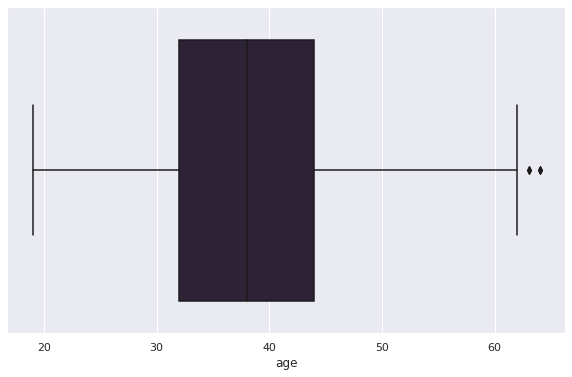

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,6))
ax =sns.boxplot(x=data['age'])

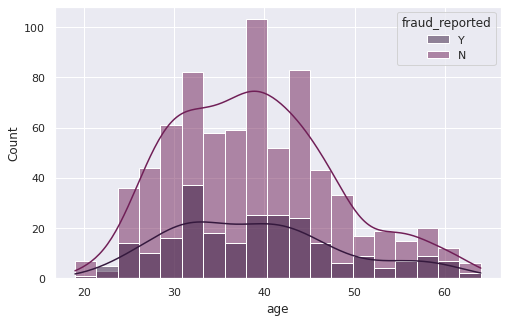

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data,x="age",kde=True,hue='fraud_reported')

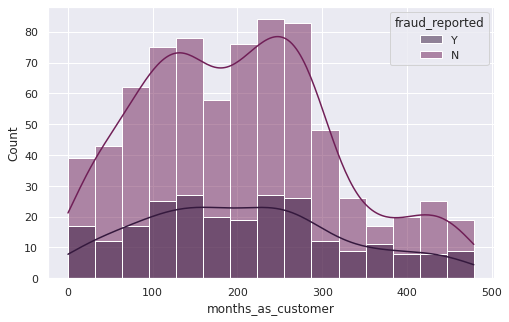

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data,x="months_as_customer",kde=True,hue='fraud_reported')

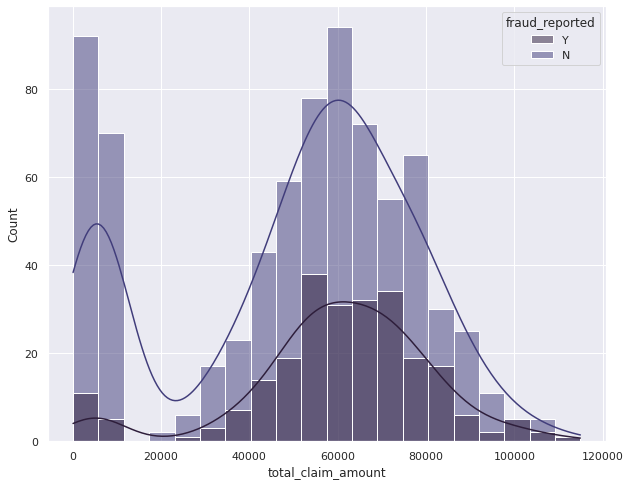

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,8))
ax =  sns.histplot(data,x="total_claim_amount",kde=True,hue='fraud_reported')

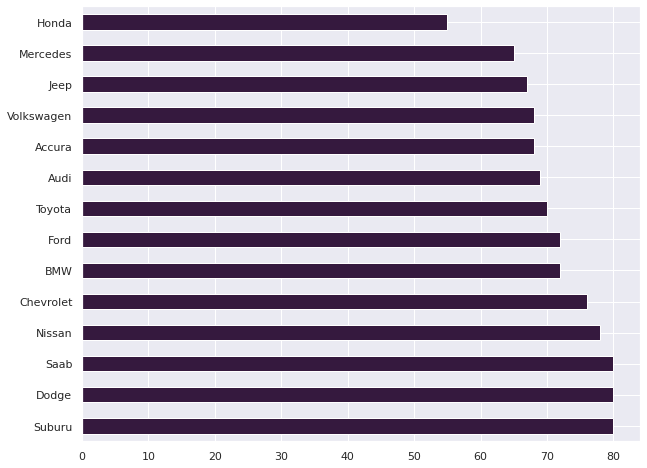

In [ ]:
sns.set_theme(style='darkgrid',palette='rocket')
plt.figure(figsize=(10,8))
plot = data['auto_make'].value_counts().head(20).plot(kind="barh")

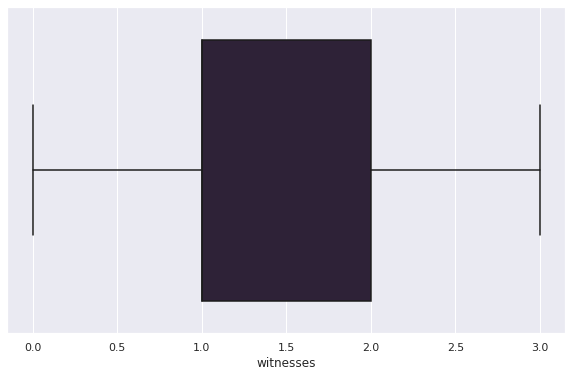

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,6))
ax =sns.boxplot(x=data[''])

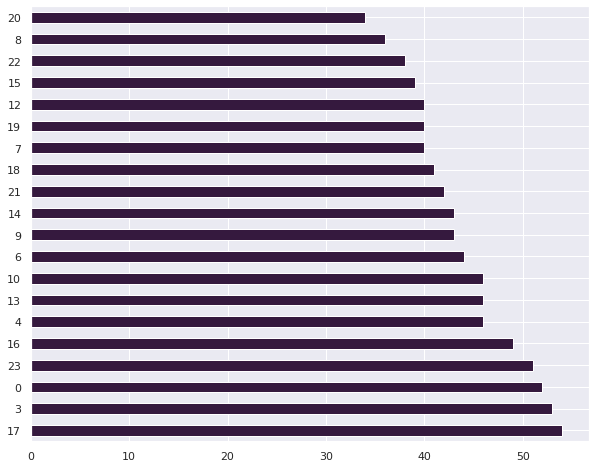

In [ ]:
sns.set_theme(style='darkgrid',palette='rocket')
plt.figure(figsize=(10,8))
plot = data['incident_hour_of_the_day'].value_counts().head(20).plot(kind="barh")

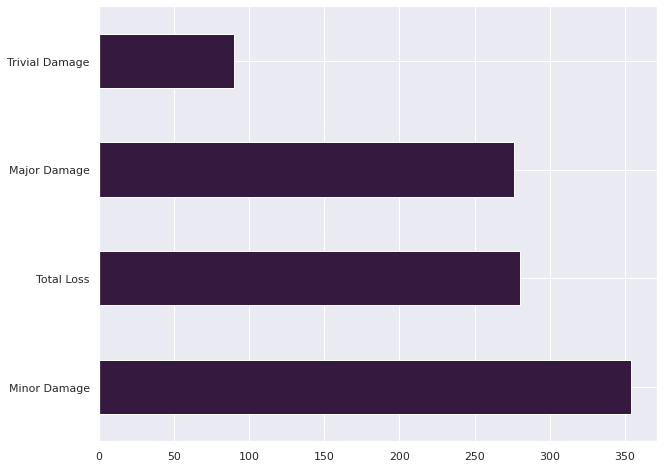

In [ ]:
sns.set_theme(style='darkgrid',palette='rocket')
plt.figure(figsize=(10,8))
plot = data['incident_severity'].value_counts().head(20).plot(kind="barh")

# Feature Scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(data)
# transform training data
data = norm.transform(data)


In [ ]:
#standardisation
from sklearn import preprocessing 
cols=['turns','white_rating', 'black_rating', 'opening_ply','rating_diff']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 
data[cols]=scaled_cols


# Encoding categorical  variables

Using binary encoder

In [ ]:
enc = OrdinalEncoder()
anglrr_df[["RELATIONSHIP STATUS","SEX", "ALCOHOL","DRUGS"]] = enc.fit_transform(anglrr_df[["RELATIONSHIP STATUS","SEX", "ALCOHOL","DRUGS"]])


In [ ]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])

#for categorical_cols with high cardinality
#binary encoding
encoder= ce.BinaryEncoder(cols=['opening_eco','increment_code'])
data_encoded=encoder.fit_transform(data) 
data=data_encoded

['increment_code', 'opening_eco']


Using frequency encoding

In [ ]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])


#frequency encoding for the categorical_cols with high cardinality
fe1= data.groupby('opening_eco').size()/len(data)
data.loc[:,'opening_encode']=data['opening_eco'].map(fe1)
fe_data=data.drop(columns=['opening_eco'],axis=1)


fe2= data.groupby('increment_code').size()/len(data)
data.loc[:,'incr_encode']=data['increment_code'].map(fe2)
fe_data=fe_data.drop(columns=['increment_code'],axis=1)



['increment_code', 'opening_eco']


# Feature Engineering
#### Feature Importance using RANDOM FOREST




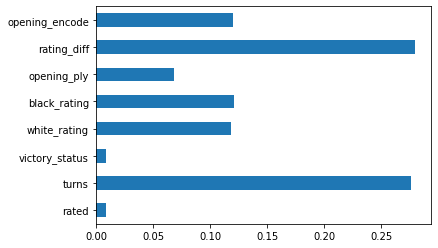

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')


# Outlier detection

In [ ]:
elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(X)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]

# Plot the data
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("Elliptic Envelope Outlier Detection", fontsize=15, pad=15)
plt.savefig("Elliptic Envelope Detection.png", dpi=80)


In [ ]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = iforest.fit_predict(X)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]


# Model selection

In [ ]:
sns.pairplot(data)